## Lending Club Load Data Analysis
### Project 
#### Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.
### Dataset columns and definition:
#### Credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
#### purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
#### int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
#### installment: The monthly installments owed by the borrower if the loan is funded.
#### log.annual.inc: The natural log of the self-reported annual income of the borrower.
#### dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
#### fico: The FICO credit score of the borrower.
#### days.with.cr.line: The number of days the borrower has had a credit line.
#### revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
#### revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
#### inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
#### delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
#### pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.shape

(9578, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## 1. Feature Transformation: Transform categorical values into numerical values (discrete)

#### The above information shows that 'purpose' is the only column that is categorical.  Therefore, the discrete values are being listed for understanding the data.
#### Next step is to use label encoder and map the discrete values to the encoded value. 

In [6]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [7]:
# The following statement will list the column names of categorical data. 
df.select_dtypes(include='object').columns

Index(['purpose'], dtype='object')

In [8]:
# Call the Label Encoder from Scikit Learn and apply the model to purpose datafield
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['purpose'] = le.fit_transform(df['purpose'])

In [9]:
# Call the mapping between the values
(le.classes_, le.transform(le.classes_))

(array(['all_other', 'credit_card', 'debt_consolidation', 'educational',
        'home_improvement', 'major_purchase', 'small_business'],
       dtype=object),
 array([0, 1, 2, 3, 4, 5, 6]))

In [10]:
df['purpose'] = df['purpose'].astype(int)

In [11]:
df.duplicated().sum()  ## This shows that there is no duplicate records

0

In [12]:
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

#### This shows that data is highly imbalanced. Therefore, data will be balanced using SMOTE. 

In [13]:
X = df.drop('credit.policy', axis=1)
y = df['credit.policy']

In [14]:
X.head()

,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: credit.policy, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X, y)

In [17]:
y.value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [18]:
y_train_sm.value_counts()

1    7710
0    7710
Name: credit.policy, dtype: int64

#### The above values show that both types of data have been balanced.  
#### Now, a dataframe can be built using the new data set for further analysis and model building. 

In [19]:
df1 = pd.concat([y_train_sm, X_train_sm], axis=1)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      15420 non-null  int64  
 1   purpose            15420 non-null  int64  
 2   int.rate           15420 non-null  float64
 3   installment        15420 non-null  float64
 4   log.annual.inc     15420 non-null  float64
 5   dti                15420 non-null  float64
 6   fico               15420 non-null  int64  
 7   days.with.cr.line  15420 non-null  float64
 8   revol.bal          15420 non-null  int64  
 9   revol.util         15420 non-null  float64
 10  inq.last.6mths     15420 non-null  int64  
 11  delinq.2yrs        15420 non-null  int64  
 12  pub.rec            15420 non-null  int64  
 13  not.fully.paid     15420 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 1.6 MB


## 2. Exploratory data analysis of different factors of the dataset

In [21]:
# The following statement gives glimpse of data for customers who do not meet the credit policy criteria
df1[df1['credit.policy'] ==0].value_counts()

credit.policy  purpose  int.rate  installment  log.annual.inc  dti        fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid
0              6        0.212100  188.930000   11.002100       0.360000   662   3660.041667        581        12.100000   5               2            0        0                 1
               1        0.130492  558.663078   12.530369       15.979736  681   7127.613613        278134     84.507770   0               0            0        0                 1
                        0.127612  232.086971   11.187797       25.418317  741   12217.745835       52959      70.572510   3               0            0        0                 1
                        0.127675  245.506027   10.836572       19.463380  690   4437.981919        7193       34.461648   4               0            0        1                 1
                        0.127717  155.773406   10.928864       17.201993  684   4319.163170        292   

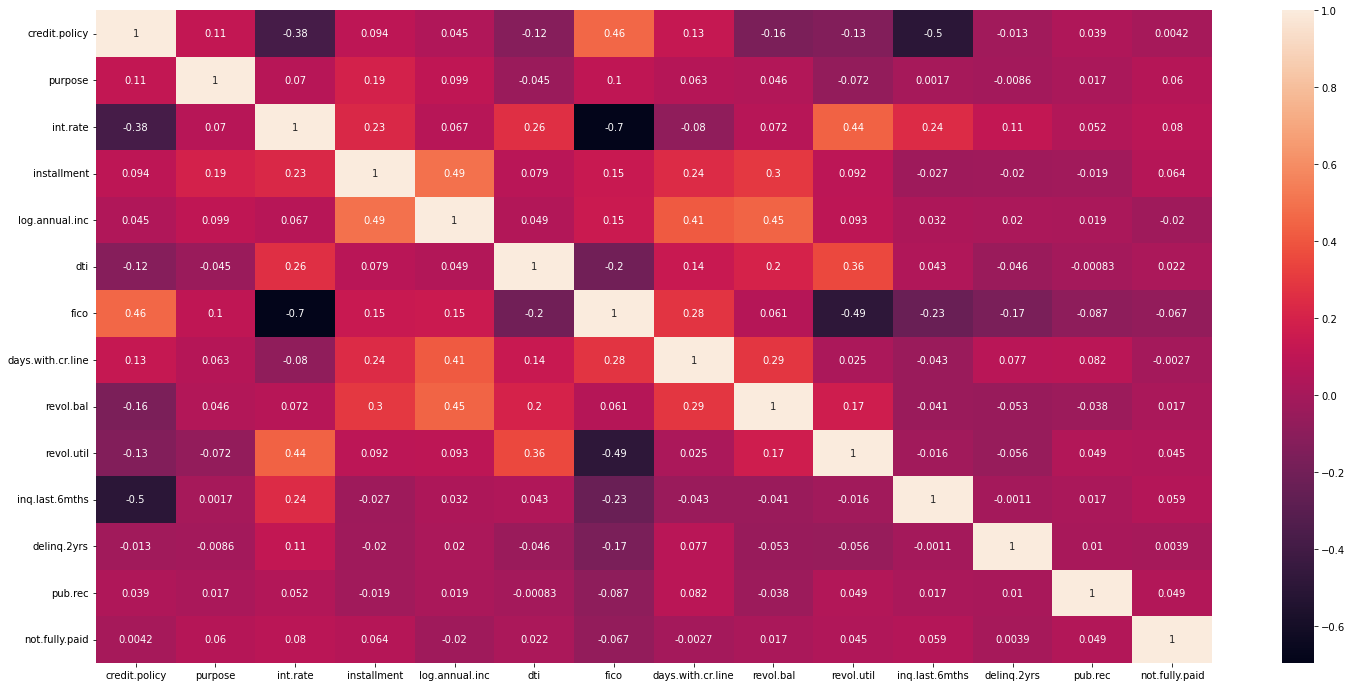

In [22]:
# Draw a heatmap with different variable
plt.figure(figsize = (25, 12))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [23]:
# From the above figure, we can tell that some of the columns are not relevant such as
# 1. purpose
# 2. dti
# 3. days.with.cr.line
# 4. revol.bal
# 5. revol.util
# 6. pub.rec

In [24]:
# Draw a pair plot for distribution and density
'''plt.figure(figsize = (25,16))
cols = ['installment', 'int.rate', 'log.annual.inc', 'fico', 'inq.last.6mths', 'not.fully.paid']
sns.pairplot(df1, vars= cols, kind= 'scatter', hue='credit.policy') 
'''

"plt.figure(figsize = (25,16))\ncols = ['installment', 'int.rate', 'log.annual.inc', 'fico', 'inq.last.6mths', 'not.fully.paid']\nsns.pairplot(df1, vars= cols, kind= 'scatter', hue='credit.policy') \n"

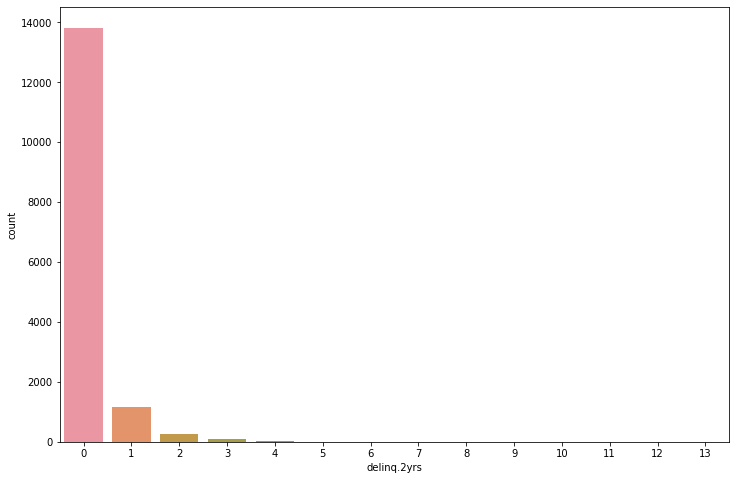

In [25]:
plt.figure(figsize = (12,8))
sns.countplot(x='delinq.2yrs', data = df1)
plt.show()

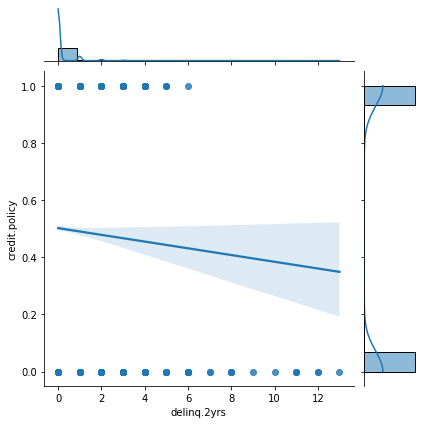

In [26]:
sns.jointplot(x=df1['delinq.2yrs'], y=df1['credit.policy'], kind='reg')

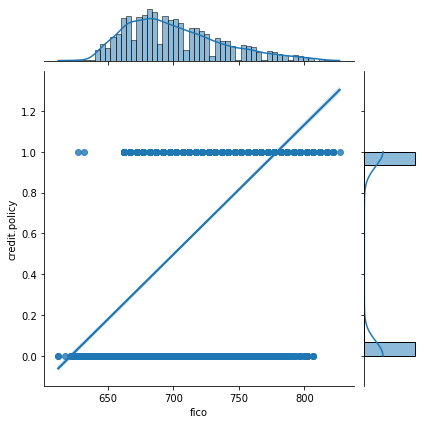

In [27]:
sns.jointplot(x=df1['fico'], y=df1['credit.policy'], kind='reg')
## The above graph shows that 
## (1) most of the customers' fico scores are between 650 and 700.
## (2) Customers below fico score 750 tend of have default.
## (3) Customers high than 750 have higher chances of not defaulting. (4) Customers below 675 do not meet credit policy.

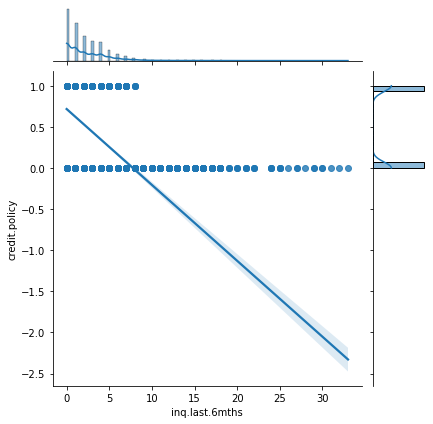

In [28]:
sns.jointplot(x=df1['inq.last.6mths'], y=df1['credit.policy'], kind='reg')
## The graph shows that the customer meets the credit policy if there has been no inquiry. 
## But as the number of inquiry increases, customers getting into default increases.

## 3. Additional Feature Engineering:

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      15420 non-null  int64  
 1   purpose            15420 non-null  int64  
 2   int.rate           15420 non-null  float64
 3   installment        15420 non-null  float64
 4   log.annual.inc     15420 non-null  float64
 5   dti                15420 non-null  float64
 6   fico               15420 non-null  int64  
 7   days.with.cr.line  15420 non-null  float64
 8   revol.bal          15420 non-null  int64  
 9   revol.util         15420 non-null  float64
 10  inq.last.6mths     15420 non-null  int64  
 11  delinq.2yrs        15420 non-null  int64  
 12  pub.rec            15420 non-null  int64  
 13  not.fully.paid     15420 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 1.6 MB


In [30]:
df2 = df1[['installment', 'log.annual.inc', 'int.rate', 'fico', 'inq.last.6mths', 'not.fully.paid']]

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   installment     15420 non-null  float64
 1   log.annual.inc  15420 non-null  float64
 2   int.rate        15420 non-null  float64
 3   fico            15420 non-null  int64  
 4   inq.last.6mths  15420 non-null  int64  
 5   not.fully.paid  15420 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 722.9 KB


In [32]:
df2.head()

,installment,log.annual.inc,int.rate,fico,inq.last.6mths,not.fully.paid
0,829.10,11.350407,0.1189,737,0,0
1,228.22,11.082143,0.1071,707,0,0
2,366.86,10.373491,0.1357,682,1,0
3,162.34,11.350407,0.1008,712,1,0
4,102.92,11.299732,0.1426,667,0,0


In [33]:
X = df2
y = df1['credit.policy']

In [34]:
X.head()

,installment,log.annual.inc,int.rate,fico,inq.last.6mths,not.fully.paid
0,829.10,11.350407,0.1189,737,0,0
1,228.22,11.082143,0.1071,707,0,0
2,366.86,10.373491,0.1357,682,1,0
3,162.34,11.350407,0.1008,712,1,0
4,102.92,11.299732,0.1426,667,0,0


In [35]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: credit.policy, dtype: int64

In [36]:
y.value_counts()

1    7710
0    7710
Name: credit.policy, dtype: int64

## 4. Modeling: After applying EDA and feature engineering, you are now ready to build the predictive models In this part, you will create a deep learning model using Keras with Tensorflow backend

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify = y, 
                                                    test_size = 0.2, # Train dataset is 80%
                                                    random_state = 12345)

In [40]:
X_train.shape

(12336, 6)

In [41]:
X_test.shape

(3084, 6)

In [42]:
# Import tensorflow 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


In [43]:
model = Sequential() 

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Create the input layer 
model.add(Input(shape=(X_train_scaled.shape[1],
                      )
               )
         )

# Create a hidden layer with 128 neurons
model.add(Dense(units=256, 
                activation='relu'
               )
         )

# Create a hidden layer with 128 neurons
model.add(Dense(units=128, 
                activation='relu'
               )
         )

# Create a hidden layer with 64 neurons
model.add(Dense(units=64,
                activation='relu'
               )
         )

# Create the output layer
model.add(Dense(units=1, 
                activation='sigmoid'
               )
         )

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1792      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 43,009
Trainable params: 43,009
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

In [48]:
result=model.fit(X_train_scaled, 
                 y_train,
                 validation_data = (X_test_scaled, y_test), 
                 epochs=60)

Epoch 1/60
386/386 [==============================] - 7s 3ms/step - loss: 0.3969 - accuracy: 0.8294 - val_loss: 0.3640 - val_accuracy: 0.8372
Epoch 2/60
386/386 [==============================] - 1s 2ms/step - loss: 0.3547 - accuracy: 0.8411 - val_loss: 0.3532 - val_accuracy: 0.8382
Epoch 3/60
386/386 [==============================] - 1s 2ms/step - loss: 0.3392 - accuracy: 0.8473 - val_loss: 0.3296 - val_accuracy: 0.8492
Epoch 4/60
386/386 [==============================] - 1s 2ms/step - loss: 0.3264 - accuracy: 0.8533 - val_loss: 0.3214 - val_accuracy: 0.8512
Epoch 5/60
386/386 [==============================] - 1s 2ms/step - loss: 0.3197 - accuracy: 0.8545 - val_loss: 0.3225 - val_accuracy: 0.8521
Epoch 6/60
386/386 [==============================] - 1s 2ms/step - loss: 0.3151 - accuracy: 0.8547 - val_loss: 0.3142 - val_accuracy: 0.8531
Epoch 7/60
386/386 [==============================] - 1s 2ms/step - loss: 0.3111 - accuracy: 0.8566 - val_loss: 0.3175 - val_accuracy: 0.8515
Epoch 

In [49]:
history = pd.DataFrame(result.history)
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.396881,0.829442,0.364035,0.837224
1,0.354658,0.841115,0.353203,0.838197
2,0.339183,0.847276,0.329622,0.849222
3,0.326404,0.853275,0.321397,0.851167
4,0.319739,0.854491,0.322490,0.852140


In [ ]:
plt.figure(figsize = (25,6))
plt.plot(history.val_loss, label='Test Set Loss')
plt.plot(history.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

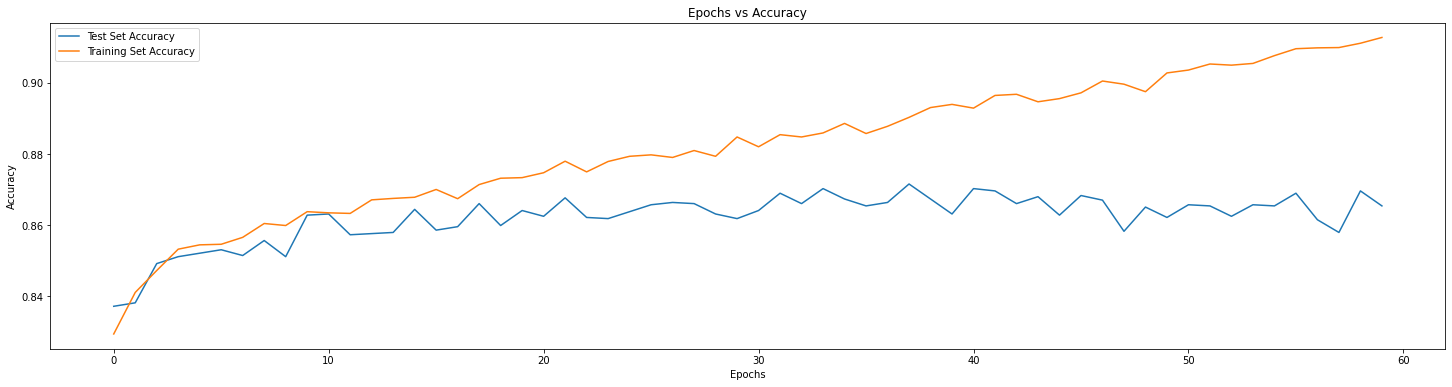

In [50]:
plt.figure(figsize = (25,6))
plt.plot(history.val_accuracy, label='Test Set Accuracy')
plt.plot(history.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### L1 Regularization

In [52]:
model_reg = Sequential()

In [54]:
model_reg.add(Input(shape = (X_train_scaled.shape[1], )))
model_reg.add(Dense(units=128,
                    activation='relu',
                    kernel_regularizer=tf.keras.regularizers.L1()
                   )
             )
model_reg.add(Dense(units=64, activation='relu'))
model_reg.add(Dense(units=32, activation='relu'))
model_reg.add(Dense(units=1, activation='sigmoid'))

In [56]:
model_reg.compile(optimizer='adam',
                  loss = 'binary_crossentropy',
                  metrics = 'accuracy')

In [57]:
model_reg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               896       
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
 input_3 (InputLayer)        multiple                  0         
                                                                 
 dense_8 (Dense)             (None, 128)               256       
                                                                 
 dense_9 (Dense)             (None, 64)               

In [58]:
result_reg=model_reg.fit(X_train_scaled, 
                 y_train,
                 validation_data = (X_test_scaled, y_test), 
                 epochs=100
                 )

Epoch 1/100
386/386 [==============================] - 2s 3ms/step - loss: 0.7053 - accuracy: 0.7807 - val_loss: 0.4530 - val_accuracy: 0.8333
Epoch 2/100
386/386 [==============================] - 1s 2ms/step - loss: 0.4494 - accuracy: 0.8223 - val_loss: 0.4284 - val_accuracy: 0.8382
Epoch 3/100
386/386 [==============================] - 1s 2ms/step - loss: 0.4332 - accuracy: 0.8267 - val_loss: 0.4179 - val_accuracy: 0.8337
Epoch 4/100
386/386 [==============================] - 1s 2ms/step - loss: 0.4155 - accuracy: 0.8348 - val_loss: 0.4043 - val_accuracy: 0.8369
Epoch 5/100
386/386 [==============================] - 1s 2ms/step - loss: 0.4072 - accuracy: 0.8331 - val_loss: 0.4007 - val_accuracy: 0.8421
Epoch 6/100
386/386 [==============================] - 1s 2ms/step - loss: 0.4033 - accuracy: 0.8328 - val_loss: 0.4002 - val_accuracy: 0.8379
Epoch 7/100
386/386 [==============================] - 1s 2ms/step - loss: 0.3904 - accuracy: 0.8352 - val_loss: 0.3743 - val_accuracy: 0.8453

### Submitted by Vinod Sinha, March 25, 2023
## The End! 